### Download Data

In [1]:
import pandas as pd
import numpy as np
# read data to pandas frame
url = 'https://raw.githubusercontent.com/Dr-Ning-An/Deep-Learning-with-Keras/main/NonlinearRegression/Data.csv'
data = pd.read_csv(url)
data.shape
# print(data.head(5))

(10000, 4)

In [2]:
inputs = data.iloc[:, 0:2]
n_inputs = inputs.shape[1]
print(inputs.head(5))
outputs = data.iloc[:, 2:4]
n_outputs = outputs.shape[1]
print(outputs.head(5))

   Coordinate x [m]  Distributed load q [kN/m]
0          1.939494                   1.093709
1          1.089809                   1.935594
2          1.239824                   1.229323
3          1.590659                   1.019202
4          1.234323                   1.867587
   Displacement u [m]  Curvature kappa [m-1]
0            7.979345              12.727456
1            2.505332              12.656563
2            2.342859               9.144864
3            4.101961               9.727217
4            3.512107              13.831237


In [3]:
from sklearn.model_selection import train_test_split
# Randomly split the data into a training and test sets by holding 30% of the data for testing.
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size = 0.3, random_state=0)

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
# define regression model
def ANN_model():
    # create model
    model = Sequential()
    model.add(Dense(128, activation='tanh', input_shape=(n_inputs,)))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(16, activation='tanh'))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(n_outputs))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [5]:
# build the model
model = ANN_model()

In [6]:
# fit the model
model.fit(inputs_train, outputs_train, epochs=500, batch_size=60)

Epoch 1/500
117/117 [==============================] - 2s 6ms/step - loss: 75.2115
Epoch 2/500
117/117 [==============================] - 1s 4ms/step - loss: 56.0941
Epoch 3/500
117/117 [==============================] - 1s 6ms/step - loss: 44.2462
Epoch 4/500
117/117 [==============================] - 1s 5ms/step - loss: 35.5564
Epoch 5/500
117/117 [==============================] - 1s 4ms/step - loss: 29.0703
Epoch 6/500
117/117 [==============================] - 1s 4ms/step - loss: 24.2539
Epoch 7/500
117/117 [==============================] - 1s 5ms/step - loss: 20.6975
Epoch 8/500
117/117 [==============================] - 1s 6ms/step - loss: 18.0904
Epoch 9/500
117/117 [==============================] - 1s 7ms/step - loss: 16.2038
Epoch 10/500
117/117 [==============================] - 1s 7ms/step - loss: 14.8555
Epoch 11/500
117/117 [==============================] - 1s 8ms/step - loss: 13.9090
Epoch 12/500
117/117 [==============================] - 1s 6ms/step - loss: 13.2613
E

In [7]:
disp_test = outputs_test.to_numpy()[:,0]
kappa_test = outputs_test.to_numpy()[:,1]

In [8]:
outputs_pred = model.predict(inputs_test)
outputs_pred_df = pd.DataFrame(outputs_pred, columns = ['Displacement u [m]','Curvature kappa [m-1]'])
print(outputs_pred_df)
disp_pred = outputs_pred_df.to_numpy()[:,0]
kappa_pred = outputs_pred_df.to_numpy()[:,1]

94/94 [==============================] - 0s 1ms/step
      Displacement u [m]  Curvature kappa [m-1]
0               2.363652               9.322746
1               2.207984               9.744277
2               2.851068              11.654379
3              13.028790              20.414770
4               6.454984              14.558311
...                  ...                    ...
2995           11.021168              19.388220
2996            3.921649               9.754422
2997           13.569484              20.671118
2998           12.133764              18.582415
2999            4.637563              13.572337

[3000 rows x 2 columns]


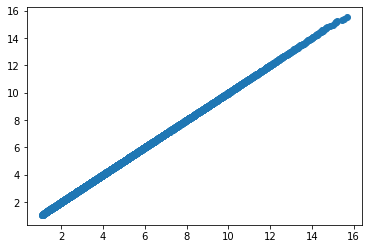

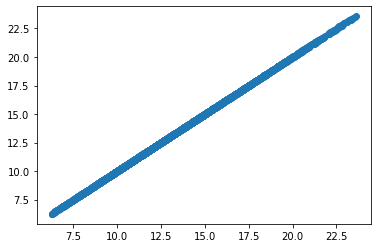

In [9]:
import matplotlib.pyplot as plt
plt.plot(disp_test, disp_pred, 'o')
plt.show()
plt.plot(kappa_test, kappa_pred, 'o')
plt.show()

In [10]:
import tensorflow as tf
def F_model(model,x,q):
    x = tf.Variable(x)
    q = tf.Variable(q)
    with tf.GradientTape() as g:
      g.watch(x)
      with tf.GradientTape() as gg:
        gg.watch(x)
        u = model(tf.stack([x,q], axis=1))[:,0]
      du_dx = gg.gradient(u, x)  
    d2u_dx2 = g.gradient(du_dx, x)  
    return u, d2u_dx2

tf.Tensor(
[10.00134087  8.96210861 11.86226845 ... 15.24750805 14.53995037
 13.83901691], shape=(3000,), dtype=float64)


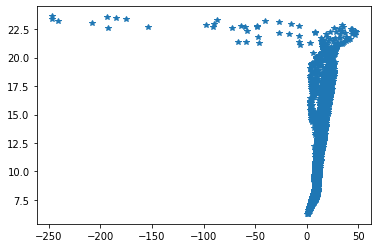

In [11]:
x = inputs_test.to_numpy()[:,0]
q = inputs_test.to_numpy()[:,1]
[u, d2u_dx2] = F_model(model, x,q)
print(d2u_dx2)
plt.plot(d2u_dx2, kappa_test, '*')
plt.show()